**NOTE :**
- This Python File runs in GoogleColab

# Import Library

Importing the libraries and file from Google Drive

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, explained_variance_score

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#1. Data Import

In [6]:
import statistics
import re 

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import scipy.cluster.hierarchy as shc

In [8]:
LP = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Laptop_Price.csv')
LP

,laptop_ID,Company,TypeName,Inches,Cpu,Ram,Memory,OpSys,Weight,Price_euros
0,1,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,macOS,1.37kg,1339.69
1,2,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,macOS,1.34kg,898.94
2,3,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,No OS,1.86kg,575.00
3,4,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,macOS,1.83kg,2537.45
4,5,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Windows 10,1.8kg,638.00
1299,1317,Lenovo,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Windows 10,1.5kg,229.00
1301,1319,HP,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,Windows 10,2.19kg,764.00


#2. Data Preparation

Cleaning up data separating "words" from strings, while keeping the 
numbers as "integers" Value

1.   Cpu
2.   Ram
3.   Memory (encoded to different Storage type column)
4.   Weight

These 4 variables requires to be cleansed. 
Encoded the **Storage Type** of the memory, to evaluate the correlation of each variable to its prices.



In [9]:
LP.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   laptop_ID    1303 non-null   int64  
 1   Company      1303 non-null   object 
 2   TypeName     1303 non-null   object 
 3   Inches       1303 non-null   float64
 4   Cpu          1303 non-null   object 
 5   Ram          1303 non-null   object 
 6   Memory       1303 non-null   object 
 7   OpSys        1303 non-null   object 
 8   Weight       1303 non-null   object 
 9   Price_euros  1303 non-null   float64
dtypes: float64(2), int64(1), object(7)
memory usage: 101.9+ KB


In [10]:
LP.isnull().sum()

laptop_ID      0
Company        0
TypeName       0
Inches         0
Cpu            0
Ram            0
Memory         0
OpSys          0
Weight         0
Price_euros    0
dtype: int64

In [11]:
LP.Cpu.unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

In [12]:
LP.Memory.unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [13]:
LP.Company.unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [14]:
# Create a pandas dataframe
LP_2 = LP
df = pd.DataFrame(LP_2)

In [15]:
# Create a lambda function to apply the LabelEncoder to each column
encoder = lambda x: LabelEncoder().fit_transform(x)

In [16]:
# Apply the lambda function to each categorical column
data_base = df.apply(encoder)

In [89]:
data_base

,laptop_ID,TypeName,Inches,Cpu,Ram,Memory,OpSys,Weight,Brand,price
0,0,4,7,65,8,4,8,38,1,524
1,1,4,7,63,8,2,8,35,1,342
2,2,3,14,74,8,16,4,74,7,168
3,3,4,13,85,1,29,8,71,1,745
4,4,4,7,67,8,16,8,38,1,637
...,...,...,...,...,...,...,...,...,...,...
1298,1298,0,10,89,5,4,5,78,10,200
1299,1299,0,7,89,1,29,5,41,10,575
1300,1300,3,10,34,3,35,5,56,10,8
1301,1301,3,14,89,7,10,5,104,7,265


In [18]:
data_base = data_base.drop(columns=['Company']).assign(Brand =data_base['Company'])
data_base = data_base.drop(columns=['Price_euros']).assign(price =data_base['Price_euros'])

In [19]:
data_base.describe()

,laptop_ID,TypeName,Inches,Cpu,Ram,Memory,OpSys,Weight,Brand,price
count,1303.00000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000
mean,651.00000,2.582502,11.979279,76.983883,5.725249,16.345357,4.808903,90.465081,6.442824,378.025326
std,376.28801,1.245231,3.628954,25.190467,2.630268,8.008281,1.035253,43.026196,4.084128,221.831865
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,325.50000,1.500000,10.000000,65.000000,5.000000,10.000000,5.000000,53.500000,4.000000,183.000000
50%,651.00000,3.000000,14.000000,78.000000,7.000000,16.000000,5.000000,96.000000,7.000000,373.000000
75%,976.50000,3.000000,14.000000,97.000000,8.000000,23.000000,5.000000,122.000000,10.000000,569.500000
max,1302.00000,5.000000,17.000000,117.000000,8.000000,38.000000,8.000000,178.000000,18.000000,790.000000


# 3. Statistic Approach

as data pre-processing step, we shall define each variables whether it performs significantly effect the output.

we will see the correlation model by using heat-map model between all variables,
either it is internal input variables, or correlation input variables to output variables

## Correlation Map (all parameters)

The correlation coefficient is a statistical measure of the strength of a linear relationship between two variables. as we know if R-squared value is squared value of r (correlation coefficient). Its values can range from -1 to 1. A correlation coefficient of -1 describes a perfect negative, or inverse, correlation, with values in one series rising as those in the other decline, and vice versa. 

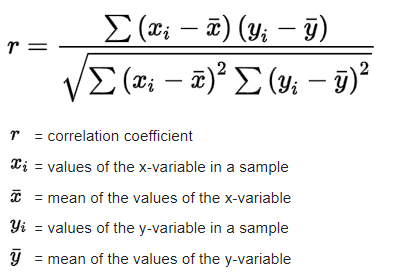

<ipython-input-20-c7c469f1f89e>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0, 0.5, 'laptop_ID'),
  Text(0, 1.5, 'TypeName'),
  Text(0, 2.5, 'Inches'),
  Text(0, 3.5, 'Cpu'),
  Text(0, 4.5, 'Ram'),
  Text(0, 5.5, 'Memory'),
  Text(0, 6.5, 'OpSys'),
  Text(0, 7.5, 'Weight'),
  Text(0, 8.5, 'Brand'),
  Text(0, 9.5, 'price')])

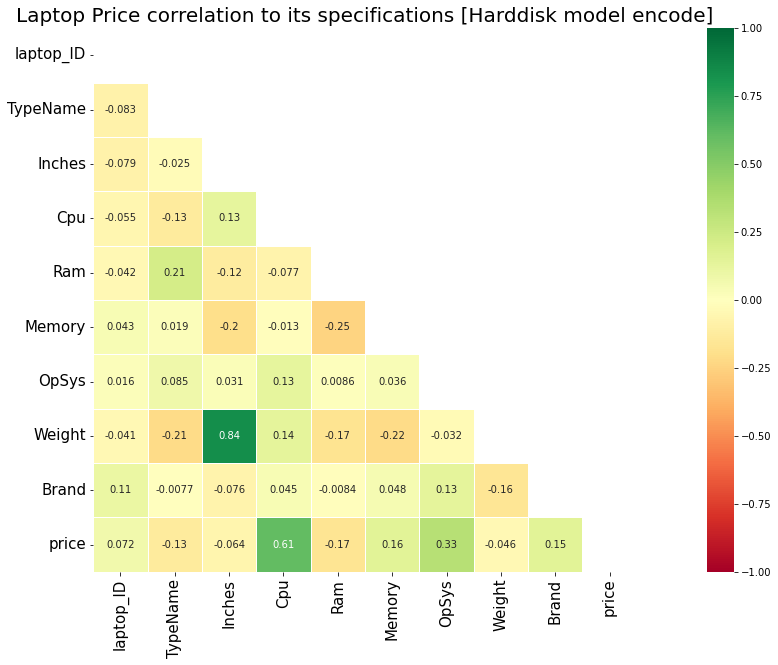

In [20]:
#Heatmap Correlation
import seaborn as sns
corr = data_base.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220,10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,cmap="RdYlGn", vmin=-1, vmax=1, center=0, cbar=True, annot =True,
            square=True, linewidths=.5, annot_kws={"size": 10})
plt.xticks(rotation=90, fontsize=15)
plt.title('Laptop Price correlation to its specifications [Harddisk model encode]', fontsize=20)
plt.yticks(fontsize=15,rotation=0 )

by Heatmap correlation on general aspect above, we see much connection at all variables in between.
- CPU_Core
- CPU_GHZ
- RAM_GB
- Weight_kg
- HDD Type
- SSD Type
- SSD+HDD model
- Memory_total

## Distribution Value

**How is the distribution of the values of these variables?**

we will see how the distribution of values contained in the dataset, between the quantity of numbers that exist against the magnitude of that value.

we will test the variable of Laptop Price

In [21]:
import statsmodels.api as sm
import pylab as py
import scipy.stats as stats

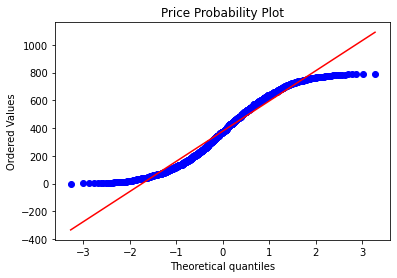

In [22]:
#Plot of Price data
stats.probplot(data_base['price'], dist= 'norm', plot=py)
plt.title('Price Probability Plot')
plt.show()

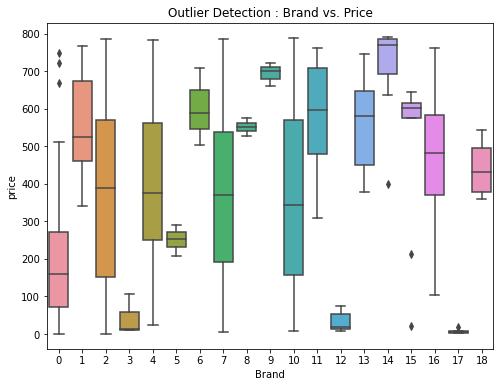

In [23]:
plt.figure(figsize = (8,6))
plt.title('Outlier Detection : Brand vs. Price')
sns.boxplot(x = 'Brand', y = 'price', data = data_base);

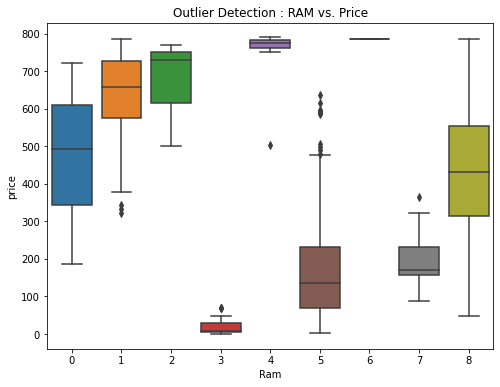

In [24]:
plt.figure(figsize = (8,6))
plt.title('Outlier Detection : RAM vs. Price')
sns.boxplot(x = 'Ram', y = 'price', data = data_base);

# Data Splitting

before we go over the Machine Learning Process, we need to split data for training and testing purpose.

input data is defined as day by day like following schedule:
- Training : 85%
- Testing : 15%

regarding to correlation map as a representation of variable importances, we then want to obtain selected data variables, such as : ALL VARIABLES

In [25]:
data_input = data_base   #.drop(['Inches','Weight_kg','Flash','HDD','Hybrid','Brand_encd','Memory_total'], axis=1)
data_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   laptop_ID  1303 non-null   int64
 1   TypeName   1303 non-null   int64
 2   Inches     1303 non-null   int64
 3   Cpu        1303 non-null   int64
 4   Ram        1303 non-null   int64
 5   Memory     1303 non-null   int64
 6   OpSys      1303 non-null   int64
 7   Weight     1303 non-null   int64
 8   Brand      1303 non-null   int64
 9   price      1303 non-null   int64
dtypes: int64(10)
memory usage: 101.9 KB


In [26]:
data_input.describe()

,laptop_ID,TypeName,Inches,Cpu,Ram,Memory,OpSys,Weight,Brand,price
count,1303.00000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000
mean,651.00000,2.582502,11.979279,76.983883,5.725249,16.345357,4.808903,90.465081,6.442824,378.025326
std,376.28801,1.245231,3.628954,25.190467,2.630268,8.008281,1.035253,43.026196,4.084128,221.831865
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,325.50000,1.500000,10.000000,65.000000,5.000000,10.000000,5.000000,53.500000,4.000000,183.000000
50%,651.00000,3.000000,14.000000,78.000000,7.000000,16.000000,5.000000,96.000000,7.000000,373.000000
75%,976.50000,3.000000,14.000000,97.000000,8.000000,23.000000,5.000000,122.000000,10.000000,569.500000
max,1302.00000,5.000000,17.000000,117.000000,8.000000,38.000000,8.000000,178.000000,18.000000,790.000000


In [27]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

In [28]:
scaler = MinMaxScaler()

In [29]:
x = data_input.drop(['price'], axis = 1) #Predictor
y = data_input['price'] #Label

In [30]:
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [31]:
x_scaled

,laptop_ID,TypeName,Inches,Cpu,Ram,Memory,OpSys,Weight,Brand
0,0.000000,0.8,0.411765,0.555556,1.000,0.105263,1.000,0.213483,0.055556
1,0.000768,0.8,0.411765,0.538462,1.000,0.052632,1.000,0.196629,0.055556
2,0.001536,0.6,0.823529,0.632479,1.000,0.421053,0.500,0.415730,0.388889
3,0.002304,0.8,0.764706,0.726496,0.125,0.763158,1.000,0.398876,0.055556
4,0.003072,0.8,0.411765,0.572650,1.000,0.421053,1.000,0.213483,0.055556
...,...,...,...,...,...,...,...,...,...
1298,0.996928,0.0,0.588235,0.760684,0.625,0.105263,0.625,0.438202,0.555556
1299,0.997696,0.0,0.411765,0.760684,0.125,0.763158,0.625,0.230337,0.555556
1300,0.998464,0.6,0.588235,0.290598,0.375,0.921053,0.625,0.314607,0.555556
1301,0.999232,0.6,0.823529,0.760684,0.875,0.263158,0.625,0.584270,0.388889


In [32]:
# dividing dataset : 
# Training Data : 85% of data (randomly)
# Testing Data : 15% of data (randomly)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, train_size = 0.85, shuffle = True)

In [33]:
x_train

,laptop_ID,TypeName,Inches,Cpu,Ram,Memory,OpSys,Weight,Brand
496,0.380952,0.6,0.823529,0.905983,1.000,0.421053,0.625,0.567416,0.555556
941,0.722734,0.6,0.941176,0.957265,0.625,0.263158,0.625,0.808989,0.111111
270,0.207373,0.8,0.411765,0.564103,1.000,0.763158,1.000,0.213483,0.055556
294,0.225806,0.6,0.823529,0.709402,1.000,0.421053,0.625,0.511236,0.555556
1222,0.938556,0.6,0.823529,0.034188,0.875,0.263158,0.625,0.589888,0.388889
...,...,...,...,...,...,...,...,...,...
84,0.064516,0.6,0.823529,0.119658,0.625,0.263158,0.625,0.589888,0.000000
538,0.413210,0.2,0.941176,0.871795,0.000,0.263158,0.625,0.730337,0.388889
1043,0.801075,0.6,0.823529,0.581197,1.000,0.421053,0.625,0.679775,0.555556
885,0.679724,0.0,0.411765,0.632479,0.625,0.421053,0.625,0.168539,0.388889


In [34]:
y_train

496     341
941     147
270     673
294     253
1222    146
       ... 
84       78
538     636
1043    410
885     636
693     748
Name: price, Length: 1107, dtype: int64

# 4. Machine Learning Process
There are few kinds of supervised - machine learning to be conduct as follows:

Regression Based Model
- Linear Regression
- Lasso Regression
- Ridge Regression
- Support Vector Regressor
- Decision Tree Regressor
- Random Forest Regressor
- Stochastic Gaussian Descent Regression
- XG-Boost Regression
- Gradient Boost Regression
- Multi-layer Perceptron Regression

The output is as follow:
- Laptop Prices

And we will check later:
- Graphic of prediction
- feature importances : to see significancy of each variables
- R2 value : as accuracy of prediction performance.

In [35]:
from sklearn import svm
from sklearn.svm import SVR, SVC
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_regression
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

## 4.1. Regression Model (Processing)

### a. Linear Regression Model

In [36]:
Lin_reg = LinearRegression()
Lin_reg.fit(x_train, y_train)

LinearRegression()

In [37]:
y_train_pred_LinReg = Lin_reg.predict(x_train)
y_test_pred_LinReg = Lin_reg.predict(x_test)
print(Lin_reg.intercept_)
print(Lin_reg.coef_)
print(Lin_reg.score(x_test, y_test))

-211.45139504663808
[  59.03890358  -45.01296866 -122.9330287   613.23179748  -64.79914856
   91.19534406  422.35763851   -4.39224514   64.40700849]
0.5014545614375889


In [38]:
r2_LinReg = r2_score(y_test,y_test_pred_LinReg).round(3)
mse_LinReg=mean_squared_error(y_test,y_test_pred_LinReg).round(3)
mae_LinReg=mean_absolute_error(y_test,y_test_pred_LinReg).round(3)
rmse_LinReg=np.sqrt(mean_squared_error(y_test,y_test_pred_LinReg)).round(3)
CV_value_LinReg= explained_variance_score(y_test,y_test_pred_LinReg).round(3)
print('Linear Regression Performance')
print('R2 : ', r2_LinReg)
print('MSE : ', mse_LinReg)
print('MAE : ', mae_LinReg)
print('RMSE : ', rmse_LinReg)
print('CV : ', CV_value_LinReg)

Linear Regression Performance
R2 :  0.501
MSE :  25275.027
MAE :  127.771
RMSE :  158.981
CV :  0.503


### b. Lasso Regression Model

In [39]:
from sklearn.linear_model import LinearRegression, Lasso
#Lasso = Lasso(alpha=0.2, fit_intercept=True, normalize=False, precompute=False, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
#Lasso = Lasso(alpha=3, fit_intercept=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
Lasso = Lasso(alpha=0.1, max_iter=1000, selection= 'random' )
Lasso.fit(x_train, y_train )

Lasso(alpha=0.1, selection='random')

In [40]:
y_train_pred_Lasso = Lasso.predict(x_train)
y_test_pred_Lasso = Lasso.predict(x_test)
print(Lasso.intercept_)
print(Lasso.coef_)
print(Lasso.score(x_test, y_test))

-208.13894325463053
[  58.20049799  -43.44470168 -121.49495427  611.40051408  -64.26363239
   89.93002217  416.73496556   -3.54780619   63.34192171]
0.500860172131114


In [41]:
r2_Lasso = r2_score(y_test,y_test_pred_Lasso).round(3)
mse_Lasso=mean_squared_error(y_test,y_test_pred_Lasso).round(3)
mae_Lasso=mean_absolute_error(y_test,y_test_pred_Lasso).round(3)
rmse_Lasso=np.sqrt(mean_squared_error(y_test,y_test_pred_Lasso)).round(3)
CV_value_Lasso= explained_variance_score(y_test,y_test_pred_Lasso).round(3)
print('Lasso Regression Performance')
print('R2 : ', r2_Lasso)
print('MSE : ', mse_Lasso)
print('MAE : ', mae_Lasso)
print('RMSE : ', rmse_Lasso)
print('CV : ', CV_value_Lasso)
print

Lasso Regression Performance
R2 :  0.501
MSE :  25305.161
MAE :  127.929
RMSE :  159.076
CV :  0.502


<function print>

### c. Ridge Regression Model

In [42]:
from sklearn.linear_model import Ridge
Ridge = Ridge()
Ridge.fit(x_train, y_train)

Ridge()

In [43]:
y_train_pred_Ridge = Ridge.predict(x_train)
y_test_pred_Ridge = Ridge.predict(x_test)
print(Ridge.intercept_)
print(Ridge.coef_)
print(Ridge.score(x_test, y_test))

-194.38377094075776
[  58.35117504  -46.17494895 -112.28087889  602.01246859  -65.00388216
   90.29159685  401.89954371  -11.38174746   64.81203354]
0.50168918368468


In [44]:
r2_Ridge = r2_score(y_test,y_test_pred_Ridge).round(3)
mse_Ridge=mean_squared_error(y_test,y_test_pred_Ridge).round(3)
mae_Ridge=mean_absolute_error(y_test,y_test_pred_Ridge).round(3)
rmse_Ridge=np.sqrt(mean_squared_error(y_test,y_test_pred_Ridge)).round(3)
CV_value_Ridge= explained_variance_score(y_test,y_test_pred_Ridge).round(3)
print('Ridge Regression Performance')
print('R2 : ', r2_Ridge)
print('MSE : ', mse_Ridge)
print('MAE : ', mae_Ridge)
print('RMSE : ', rmse_Ridge)
print('CV : ', CV_value_Ridge)

Ridge Regression Performance
R2 :  0.502
MSE :  25263.132
MAE :  128.181
RMSE :  158.944
CV :  0.503


### d. Support Vector Regression Model

In [45]:
lr_list = [1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597,3000]

for find_optimum in lr_list:
  SVR_optimum = SVR( kernel = 'linear', gamma= 'auto' , degree=6, tol=0.001, C=find_optimum, epsilon= 0.1, cache_size=200)
#find the most optimum C-value for SVRegression
  
  SVR_optimum.fit(x_train, y_train)

  print("C-Value: {}".format(find_optimum))
  print("Accuracy score (training): {:.3f}".format(SVR_optimum.score(x_train, y_train)))
  print("Accuracy score (validation): {:.3f}".format(SVR_optimum.score(x_test, y_test)))
  print()

C-Value: 1
Accuracy score (training): 0.176
Accuracy score (validation): 0.174

C-Value: 2
Accuracy score (training): 0.287
Accuracy score (validation): 0.295

C-Value: 3
Accuracy score (training): 0.352
Accuracy score (validation): 0.366

C-Value: 5
Accuracy score (training): 0.419
Accuracy score (validation): 0.436

C-Value: 8
Accuracy score (training): 0.462
Accuracy score (validation): 0.475

C-Value: 13
Accuracy score (training): 0.488
Accuracy score (validation): 0.498

C-Value: 21
Accuracy score (training): 0.493
Accuracy score (validation): 0.497

C-Value: 34
Accuracy score (training): 0.492
Accuracy score (validation): 0.490

C-Value: 55
Accuracy score (training): 0.491
Accuracy score (validation): 0.487

C-Value: 89
Accuracy score (training): 0.487
Accuracy score (validation): 0.477

C-Value: 144
Accuracy score (training): 0.485
Accuracy score (validation): 0.472

C-Value: 233
Accuracy score (training): 0.486
Accuracy score (validation): 0.472

C-Value: 377
Accuracy score (tr

In [46]:
from sklearn.svm import SVR
model_SVR = SVR_optimum = SVR( kernel = 'linear', gamma= 'scale' , degree=6, C=144)
model_SVR.fit(x_train, y_train)

SVR(C=144, degree=6, kernel='linear')

In [47]:
# use model to predict
y_test_pred_SVR = model_SVR.predict(x_test)

y_test_pred_SVR = y_test_pred_SVR.reshape(-1,1)
print(model_SVR.score(x_test, y_test))
print(np.sqrt(mean_squared_error(y_test,y_test_pred_SVR)).round(3))

0.4717028435561109
163.656


In [48]:
r2_SVR = r2_score(y_test,y_test_pred_SVR).round(3)
mse_SVR=mean_squared_error(y_test,y_test_pred_SVR).round(3)
mae_SVR=mean_absolute_error(y_test,y_test_pred_SVR).round(3)
rmse_SVR=np.sqrt(mean_squared_error(y_test,y_test_pred_SVR)).round(3)
CV_value_SVR= explained_variance_score(y_test,y_test_pred_SVR).round(3)
print('Support Vector Regression Performance')
print('R2 : ', r2_SVR)
print('MSE : ', mse_SVR)
print('MAE : ', mae_SVR)
print('RMSE : ', rmse_SVR)
print('CV : ', CV_value_SVR)

Support Vector Regression Performance
R2 :  0.472
MSE :  26783.366
MAE :  128.827
RMSE :  163.656
CV :  0.474


In [49]:
print(model_SVR.intercept_)
print(model_SVR.coef_)
print(model_SVR.score(x_test, y_test))

[-230.43349545]
[[  84.76336671   -9.5595832  -183.3260106   720.08089102  -80.4283458
    95.83581752  355.46890699   14.79701624   76.47396204]]
0.4717028435561109


### e. Decision Tree Regression

In [50]:
lr_list = [2, 3, 4, 5, 6, 7,8,10, 12,15,20,25,50]

for find_optimum in lr_list:
  DTR_optimum = DecisionTreeRegressor(max_depth=find_optimum, random_state=10)
#find the most optimum C value for DTC Regressor
  
  DTR_optimum.fit(x_train, y_train)

  print("Optimum Max Depth: {}".format(find_optimum))
  print("Accuracy score (training): {:.3f}".format(DTR_optimum.score(x_train, y_train)))
  print("Accuracy score (validation): {:.3f}".format(DTR_optimum.score(x_test, y_test)))
  print()

Optimum Max Depth: 2
Accuracy score (training): 0.556
Accuracy score (validation): 0.526

Optimum Max Depth: 3
Accuracy score (training): 0.660
Accuracy score (validation): 0.621

Optimum Max Depth: 4
Accuracy score (training): 0.742
Accuracy score (validation): 0.713

Optimum Max Depth: 5
Accuracy score (training): 0.799
Accuracy score (validation): 0.750

Optimum Max Depth: 6
Accuracy score (training): 0.829
Accuracy score (validation): 0.770

Optimum Max Depth: 7
Accuracy score (training): 0.855
Accuracy score (validation): 0.761

Optimum Max Depth: 8
Accuracy score (training): 0.882
Accuracy score (validation): 0.759

Optimum Max Depth: 10
Accuracy score (training): 0.935
Accuracy score (validation): 0.774

Optimum Max Depth: 12
Accuracy score (training): 0.970
Accuracy score (validation): 0.753

Optimum Max Depth: 15
Accuracy score (training): 0.990
Accuracy score (validation): 0.749

Optimum Max Depth: 20
Accuracy score (training): 0.998
Accuracy score (validation): 0.776

Optimu

In [51]:
lr_list = [2, 3, 4, 5, 6, 7,8,10, 15, 25,50, 100]

for find_optimum in lr_list:
  DTR_optimum = DecisionTreeRegressor(max_depth=6, random_state=find_optimum)
#find the most optimum C value for DTC Regressor
  
  DTR_optimum.fit(x_train, y_train)

  print("Optimum random state: {}".format(find_optimum))
  print("Accuracy score (training): {:.3f}".format(DTR_optimum.score(x_train, y_train)))
  print("Accuracy score (validation): {:.3f}".format(DTR_optimum.score(x_test, y_test)))
  print()

Optimum random state: 2
Accuracy score (training): 0.829
Accuracy score (validation): 0.773

Optimum random state: 3
Accuracy score (training): 0.829
Accuracy score (validation): 0.769

Optimum random state: 4
Accuracy score (training): 0.829
Accuracy score (validation): 0.774

Optimum random state: 5
Accuracy score (training): 0.829
Accuracy score (validation): 0.778

Optimum random state: 6
Accuracy score (training): 0.829
Accuracy score (validation): 0.773

Optimum random state: 7
Accuracy score (training): 0.829
Accuracy score (validation): 0.770

Optimum random state: 8
Accuracy score (training): 0.829
Accuracy score (validation): 0.765

Optimum random state: 10
Accuracy score (training): 0.829
Accuracy score (validation): 0.770

Optimum random state: 15
Accuracy score (training): 0.829
Accuracy score (validation): 0.770

Optimum random state: 25
Accuracy score (training): 0.829
Accuracy score (validation): 0.778

Optimum random state: 50
Accuracy score (training): 0.829
Accuracy 

In [52]:
# Fit decision tree model
DT_Reg = DecisionTreeRegressor(max_depth=6, random_state=6 )
DT_Reg.fit(x_train, y_train)

# Fit decision tree input-output
model_DTR = DT_Reg.fit(x_train, y_train)

In [53]:
y_train_pred_DTR = model_DTR.predict(x_train)
y_test_pred_DTR = model_DTR.predict(x_test)
print(model_DTR.score(x_test, y_test))

0.7729849308627732


In [54]:
f_importance_DTR = pd.DataFrame({'features':x_train.columns,
                                'feature_importances DTR':DT_Reg.feature_importances_}).sort_values(by = 'feature_importances DTR',ascending = False)
f_importance_DTR

,features,feature_importances DTR
3,Cpu,0.500196
4,Ram,0.261165
7,Weight,0.124631
1,TypeName,0.066578
6,OpSys,0.018797
0,laptop_ID,0.011281
5,Memory,0.007001
8,Brand,0.006532
2,Inches,0.003818


In [55]:
r2_DTR = r2_score(y_test,y_test_pred_DTR).round(3)
mse_DTR=mean_squared_error(y_test,y_test_pred_DTR).round(3)
mae_DTR=mean_absolute_error(y_test,y_test_pred_DTR).round(3)
rmse_DTR=np.sqrt(mean_squared_error(y_test,y_test_pred_DTR)).round(3)
CV_value_DTR= explained_variance_score(y_test,y_test_pred_DTR).round(3)
print('Linear Regression Performance')
print('R2 : ', r2_DTR)
print('MSE : ', mse_DTR)
print('MAE : ', mae_DTR)
print('RMSE : ', rmse_DTR)
print('CV : ', CV_value_DTR)

Linear Regression Performance
R2 :  0.773
MSE :  11509.106
MAE :  79.589
RMSE :  107.28
CV :  0.773


In [56]:
#plt.figure(figsize=(25, 12))
#plot_tree(DT_Reg)
#plt.show()

### f. Random Forest Regression Model

In [57]:
lr_list = [2, 4, 6,8,10,15,20,25,50, 100]

for find_optimum in lr_list:
  RFR_optimum = RandomForestRegressor(max_depth=find_optimum, random_state=1)
#find the most optimum C value for RFR Regressor
  
  RFR_optimum.fit(x_train, y_train)

  print("Optimum Max Depth: {}".format(find_optimum))
  print("Accuracy score (training): {:.3f}".format(RFR_optimum.score(x_train, y_train)))
  print("Accuracy score (validation): {:.3f}".format(RFR_optimum.score(x_test, y_test)))
  print()

Optimum Max Depth: 2
Accuracy score (training): 0.564
Accuracy score (validation): 0.540

Optimum Max Depth: 4
Accuracy score (training): 0.766
Accuracy score (validation): 0.745

Optimum Max Depth: 6
Accuracy score (training): 0.858
Accuracy score (validation): 0.819

Optimum Max Depth: 8
Accuracy score (training): 0.908
Accuracy score (validation): 0.843

Optimum Max Depth: 10
Accuracy score (training): 0.942
Accuracy score (validation): 0.854

Optimum Max Depth: 15
Accuracy score (training): 0.976
Accuracy score (validation): 0.864

Optimum Max Depth: 20
Accuracy score (training): 0.980
Accuracy score (validation): 0.864

Optimum Max Depth: 25
Accuracy score (training): 0.981
Accuracy score (validation): 0.864

Optimum Max Depth: 50
Accuracy score (training): 0.981
Accuracy score (validation): 0.864

Optimum Max Depth: 100
Accuracy score (training): 0.981
Accuracy score (validation): 0.864



In [58]:
lr_list = [1,2, 4, 6,8,10,15,20,25,50, 100]

for find_optimum in lr_list:
  RFR_optimum = RandomForestRegressor(max_depth=25, random_state=find_optimum)
#find the most optimum C value for RFR Regressor
  
  RFR_optimum.fit(x_train, y_train)

  print("Optimum random_state : {}".format(find_optimum))
  print("Accuracy score (training): {:.3f}".format(RFR_optimum.score(x_train, y_train)))
  print("Accuracy score (validation): {:.3f}".format(RFR_optimum.score(x_test, y_test)))
  print()

Optimum random_state : 1
Accuracy score (training): 0.981
Accuracy score (validation): 0.864

Optimum random_state : 2
Accuracy score (training): 0.981
Accuracy score (validation): 0.864

Optimum random_state : 4
Accuracy score (training): 0.981
Accuracy score (validation): 0.870

Optimum random_state : 6
Accuracy score (training): 0.981
Accuracy score (validation): 0.864

Optimum random_state : 8
Accuracy score (training): 0.981
Accuracy score (validation): 0.867

Optimum random_state : 10
Accuracy score (training): 0.980
Accuracy score (validation): 0.870

Optimum random_state : 15
Accuracy score (training): 0.981
Accuracy score (validation): 0.864

Optimum random_state : 20
Accuracy score (training): 0.981
Accuracy score (validation): 0.862

Optimum random_state : 25
Accuracy score (training): 0.980
Accuracy score (validation): 0.865

Optimum random_state : 50
Accuracy score (training): 0.982
Accuracy score (validation): 0.866

Optimum random_state : 100
Accuracy score (training): 0

In [59]:
model_RFR = RandomForestRegressor(max_depth= 25, random_state=1)
model_RFR.fit(x_train, y_train)

RandomForestRegressor(max_depth=25, random_state=1)

In [60]:
# use model to predict
y_test_pred_RFR = (model_RFR.predict(x_test)).reshape(-1,1)

In [61]:
f_importance_RFR = pd.DataFrame({'features':x_train.columns,
                                'feature_importances':model_RFR.feature_importances_}).sort_values(by = 'feature_importances',ascending = False)
f_importance_RFR

,features,feature_importances
3,Cpu,0.429789
4,Ram,0.240578
7,Weight,0.125330
1,TypeName,0.072156
0,laptop_ID,0.047477
5,Memory,0.030122
8,Brand,0.019391
2,Inches,0.017768
6,OpSys,0.017390


In [62]:
r2_RFR = r2_score(y_test,y_test_pred_RFR).round(3)
mse_RFR = mean_squared_error(y_test,y_test_pred_RFR).round(3)
mae_RFR = mean_absolute_error(y_test,y_test_pred_RFR).round(3)
rmse_RFR = np.sqrt(mean_squared_error(y_test,y_test_pred_RFR)).round(3)
CV_value_RFR = explained_variance_score(y_test,y_test_pred_RFR).round(3)
print('Random Forest Regression Performance')
print('R2 : ', r2_RFR)
print('MSE : ', mse_RFR)
print('MAE : ', mae_RFR)
print('RMSE : ', rmse_RFR)
print('CV : ', CV_value_RFR)

Random Forest Regression Performance
R2 :  0.864
MSE :  6906.707
MAE :  59.713
RMSE :  83.107
CV :  0.864


### g. Stochastic Gaussian Descent Regression

In [63]:
from sklearn.linear_model import SGDRegressor

In [64]:
lr_list = [0.001,0.005,0.01,0.05,0.1, 0.15, 0.2, 0.25,0.35,0.5]

for find_optimum in lr_list:
  SGD_optimum = SGDRegressor( alpha=0.0001, l1_ratio= find_optimum,  max_iter=3000, tol=0.001, validation_fraction=0.176, eta0=0.01, power_t=0.25  )
#find the most optimum l1_ratio for SGDRegression
  
  SGD_optimum.fit(x_train, y_train)

  print("Optimum l1_ratio : {}".format(find_optimum))
  print("Accuracy score (training): {:.3f}".format(SGD_optimum.score(x_train, y_train)))
  print("Accuracy score (validation): {:.3f}".format(SGD_optimum.score(x_test, y_test)))
  print()

Optimum l1_ratio : 0.001
Accuracy score (training): 0.490
Accuracy score (validation): 0.495

Optimum l1_ratio : 0.005
Accuracy score (training): 0.494
Accuracy score (validation): 0.497

Optimum l1_ratio : 0.01
Accuracy score (training): 0.494
Accuracy score (validation): 0.497

Optimum l1_ratio : 0.05
Accuracy score (training): 0.490
Accuracy score (validation): 0.495

Optimum l1_ratio : 0.1
Accuracy score (training): 0.492
Accuracy score (validation): 0.496

Optimum l1_ratio : 0.15
Accuracy score (training): 0.490
Accuracy score (validation): 0.494

Optimum l1_ratio : 0.2
Accuracy score (training): 0.492
Accuracy score (validation): 0.496

Optimum l1_ratio : 0.25
Accuracy score (training): 0.492
Accuracy score (validation): 0.495

Optimum l1_ratio : 0.35
Accuracy score (training): 0.488
Accuracy score (validation): 0.493

Optimum l1_ratio : 0.5
Accuracy score (training): 0.491
Accuracy score (validation): 0.495



In [65]:
#SGD_optimum = SGDRegressor( alpha=0.0001, l1_ratio= 0.25,  max_iter=3000, tol=0.005, validation_fraction=0.176, eta0=0.15, power_t=0.2 )
model_SGD = SGDRegressor(l1_ratio= 0.1 )
model_SGD.fit(x_train, y_train)

SGDRegressor(l1_ratio=0.1)

In [66]:
y_train_pred_SGD = model_SGD.predict(x_train)
y_test_pred_SGD = model_SGD.predict(x_test)

In [67]:
r2_SGD = r2_score(y_test,y_test_pred_SGD).round(3)
mse_SGD =mean_squared_error(y_test,y_test_pred_SGD).round(3)
mae_SGD =mean_absolute_error(y_test,y_test_pred_SGD).round(3)
rmse_SGD =np.sqrt(mean_squared_error(y_test,y_test_pred_SGD)).round(3)
CV_value_SGD = explained_variance_score(y_test,y_test_pred_SGD).round(3)
print('Stoc.Gaussian Desc. Regression Performance')
print('R2 : ', r2_SGD)
print('MSE : ', mse_SGD)
print('MAE : ', mae_SGD)
print('RMSE : ', rmse_SGD)
print('CV : ', CV_value_SGD)

Stoc.Gaussian Desc. Regression Performance
R2 :  0.498
MSE :  25450.495
MAE :  129.669
RMSE :  159.532
CV :  0.499


### h. XG Boost Regression

In [68]:
import xgboost as xg

In [69]:
lr_list = [1,2,3,4,5,8,13,21,34,55,89,144]

for find_optimum in lr_list:
  XGB_optimum = xg.XGBRegressor( max_depth=find_optimum, learning_rate = 0.1  , random_state= 100 ) 
#find the most optimum max_depth for XGBoost Regression
  
  XGB_optimum.fit(x_train, y_train)

  print("Optimum max_depth: {}".format(find_optimum))
  print("Accuracy score (training): {:.3f}".format(XGB_optimum.score(x_train, y_train)))
  print("Accuracy score (validation): {:.3f}".format(XGB_optimum.score(x_test, y_test)))
  print()

Optimum max_depth: 1
Accuracy score (training): 0.764
Accuracy score (validation): 0.763

Optimum max_depth: 2
Accuracy score (training): 0.867
Accuracy score (validation): 0.838

Optimum max_depth: 3
Accuracy score (training): 0.907
Accuracy score (validation): 0.867

Optimum max_depth: 4
Accuracy score (training): 0.938
Accuracy score (validation): 0.882

Optimum max_depth: 5
Accuracy score (training): 0.958
Accuracy score (validation): 0.873

Optimum max_depth: 8
Accuracy score (training): 0.994
Accuracy score (validation): 0.876

Optimum max_depth: 13
Accuracy score (training): 1.000
Accuracy score (validation): 0.863

Optimum max_depth: 21
Accuracy score (training): 1.000
Accuracy score (validation): 0.857

Optimum max_depth: 34
Accuracy score (training): 1.000
Accuracy score (validation): 0.860

Optimum max_depth: 55
Accuracy score (training): 1.000
Accuracy score (validation): 0.860

Optimum max_depth: 89
Accuracy score (training): 1.000
Accuracy score (validation): 0.860

Optim

In [70]:
lr_list = [0.001,0.005,0.01,0.05,0.075, 0.09,0.1,0.15,0.2, 0.25,0.35,0.5,0.75,1,1.25,1.5,1.75]

for find_optimum in lr_list:
  XGB_optimum = xg.XGBRegressor( max_depth=4, learning_rate = find_optimum, random_state= 100 ) 
#find the most optimum learning_rate for XGBoost Regression
  
  XGB_optimum.fit(x_train, y_train)

  print("Optimum learning_rate: {}".format(find_optimum))
  print("Accuracy score (training): {:.3f}".format(XGB_optimum.score(x_train, y_train)))
  print("Accuracy score (validation): {:.3f}".format(XGB_optimum.score(x_test, y_test)))
  print()

Optimum learning_rate: 0.001
Accuracy score (training): -2.308
Accuracy score (validation): -1.953

Optimum learning_rate: 0.005
Accuracy score (training): -0.635
Accuracy score (validation): -0.508

Optimum learning_rate: 0.01
Accuracy score (training): 0.268
Accuracy score (validation): 0.305

Optimum learning_rate: 0.05
Accuracy score (training): 0.910
Accuracy score (validation): 0.869

Optimum learning_rate: 0.075
Accuracy score (training): 0.925
Accuracy score (validation): 0.874

Optimum learning_rate: 0.09
Accuracy score (training): 0.932
Accuracy score (validation): 0.883

Optimum learning_rate: 0.1
Accuracy score (training): 0.938
Accuracy score (validation): 0.882

Optimum learning_rate: 0.15
Accuracy score (training): 0.951
Accuracy score (validation): 0.886

Optimum learning_rate: 0.2
Accuracy score (training): 0.961
Accuracy score (validation): 0.882

Optimum learning_rate: 0.25
Accuracy score (training): 0.969
Accuracy score (validation): 0.879

Optimum learning_rate: 0.

In [71]:
model_XGB = xg.XGBRegressor( max_depth=4, learning_rate = 0.2, random_state= 100  )
model_XGB.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=100, ...)

In [72]:
# use model to predict
y_test_pred_XGB = model_XGB.predict(x_test)

y_test_pred_XGB = y_test_pred_XGB.reshape(-1,1)
print(model_XGB.score(x_test, y_test))
print(np.sqrt(mean_squared_error(y_test,y_test_pred_XGB)).round(3))

0.8816776302140061
77.451


In [73]:
r2_XGB = r2_score(y_test,y_test_pred_XGB).round(3)
mse_XGB =mean_squared_error(y_test,y_test_pred_XGB).round(3)
mae_XGB =mean_absolute_error(y_test,y_test_pred_XGB).round(3)
rmse_XGB =np.sqrt(mean_squared_error(y_test,y_test_pred_XGB)).round(3)
CV_value_XGB = explained_variance_score(y_test,y_test_pred_XGB).round(3)
print('X-Gradient Boost Performance')
print('R2 : ', r2_XGB)
print('MSE : ', mse_XGB)
print('MAE : ', mae_XGB)
print('RMSE : ', rmse_XGB)
print('CV : ', CV_value_XGB)

X-Gradient Boost Performance
R2 :  0.882
MSE :  5998.653
MAE :  57.982
RMSE :  77.451
CV :  0.882


In [74]:
f_importance_XGB = pd.DataFrame({'features':x_train.columns,
                                'feature_importances XGBoost':model_XGB.feature_importances_}).sort_values(by = 'feature_importances XGBoost',ascending = False)
f_importance_XGB

,features,feature_importances XGBoost
4,Ram,0.420799
3,Cpu,0.240771
1,TypeName,0.099978
6,OpSys,0.089206
7,Weight,0.047859
5,Memory,0.040714
2,Inches,0.034534
0,laptop_ID,0.013834
8,Brand,0.012305


### i. Gradient Boost Regression

In [75]:
from sklearn.ensemble import GradientBoostingRegressor

In [76]:
lr_list = [10,20,50,100,110,120, 130, 150,250,400,500,1000]

for find_optimum in lr_list:
  GBR_optimum = GradientBoostingRegressor( n_estimators = find_optimum, learning_rate=0.1, validation_fraction = 0.176 )
#find the most optimum n_estimator for GBRegression
  
  GBR_optimum.fit(x_train, y_train)

  print("Optimum n_estimator: {}".format(find_optimum))
  print("Accuracy score (training): {:.3f}".format(GBR_optimum.score(x_train, y_train)))
  print("Accuracy score (validation): {:.3f}".format(GBR_optimum.score(x_test, y_test)))
  print()

Optimum n_estimator: 10
Accuracy score (training): 0.637
Accuracy score (validation): 0.617

Optimum n_estimator: 20
Accuracy score (training): 0.786
Accuracy score (validation): 0.766

Optimum n_estimator: 50
Accuracy score (training): 0.876
Accuracy score (validation): 0.847

Optimum n_estimator: 100
Accuracy score (training): 0.911
Accuracy score (validation): 0.867

Optimum n_estimator: 110
Accuracy score (training): 0.915
Accuracy score (validation): 0.868

Optimum n_estimator: 120
Accuracy score (training): 0.919
Accuracy score (validation): 0.872

Optimum n_estimator: 130
Accuracy score (training): 0.922
Accuracy score (validation): 0.874

Optimum n_estimator: 150
Accuracy score (training): 0.927
Accuracy score (validation): 0.877

Optimum n_estimator: 250
Accuracy score (training): 0.945
Accuracy score (validation): 0.875

Optimum n_estimator: 400
Accuracy score (training): 0.961
Accuracy score (validation): 0.880

Optimum n_estimator: 500
Accuracy score (training): 0.969
Accur

In [77]:
lr_list = [0.001,0.005,0.01,0.05,0.1, 0.15,0.2,0.25,0.35,0.5]

for find_optimum in lr_list:
  GBR_optimum = GradientBoostingRegressor( n_estimators = 150, learning_rate=find_optimum, validation_fraction = 0.176 )
#find the most optimum learning_rate for GBRegression
  
  GBR_optimum.fit(x_train, y_train)

  print("Optimum learning_rate: {}".format(find_optimum))
  print("Accuracy score (training): {:.3f}".format(GBR_optimum.score(x_train, y_train)))
  print("Accuracy score (validation): {:.3f}".format(GBR_optimum.score(x_test, y_test)))
  print()

Optimum learning_rate: 0.001
Accuracy score (training): 0.172
Accuracy score (validation): 0.161

Optimum learning_rate: 0.005
Accuracy score (training): 0.546
Accuracy score (validation): 0.531

Optimum learning_rate: 0.01
Accuracy score (training): 0.722
Accuracy score (validation): 0.701

Optimum learning_rate: 0.05
Accuracy score (training): 0.898
Accuracy score (validation): 0.863

Optimum learning_rate: 0.1
Accuracy score (training): 0.927
Accuracy score (validation): 0.877

Optimum learning_rate: 0.15
Accuracy score (training): 0.944
Accuracy score (validation): 0.883

Optimum learning_rate: 0.2
Accuracy score (training): 0.953
Accuracy score (validation): 0.877

Optimum learning_rate: 0.25
Accuracy score (training): 0.962
Accuracy score (validation): 0.883

Optimum learning_rate: 0.35
Accuracy score (training): 0.973
Accuracy score (validation): 0.876

Optimum learning_rate: 0.5
Accuracy score (training): 0.982
Accuracy score (validation): 0.882



In [78]:
model_GBReg = GradientBoostingRegressor( n_estimators = 150, learning_rate=0.15, validation_fraction = 0.176  )
model_GBReg.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.15, n_estimators=150,
                          validation_fraction=0.176)

In [79]:
# use model to predict
y_test_pred_GBReg = model_GBReg.predict(x_test)

y_test_pred_GBReg = y_test_pred_GBReg.reshape(-1,1)
print(model_GBReg.score(x_test, y_test))
print(np.sqrt(mean_squared_error(y_test,y_test_pred_GBReg)).round(3))

0.8834250949999908
76.877


In [80]:
r2_GBReg = r2_score(y_test,y_test_pred_GBReg).round(3)
mse_GBReg =mean_squared_error(y_test,y_test_pred_GBReg).round(3)
mae_GBReg =mean_absolute_error(y_test,y_test_pred_GBReg).round(3)
rmse_GBReg =np.sqrt(mean_squared_error(y_test,y_test_pred_GBReg)).round(3)
CV_value_GBReg = explained_variance_score(y_test,y_test_pred_GBReg).round(3)
print('Gradient Boost Regression Performance')
print('R2 : ', r2_GBReg)
print('MSE : ', mse_GBReg)
print('MAE : ', mae_GBReg)
print('RMSE : ', rmse_GBReg)
print('CV : ', CV_value_GBReg)

Gradient Boost Regression Performance
R2 :  0.883
MSE :  5910.061
MAE :  56.531
RMSE :  76.877
CV :  0.883


In [81]:
f_importance_GBR = pd.DataFrame({'features':x_train.columns,
                                'feature_importances GBR':model_GBReg.feature_importances_}).sort_values(by = 'feature_importances GBR',ascending = False)
f_importance_GBR

,features,feature_importances GBR
3,Cpu,0.475990
4,Ram,0.197044
1,TypeName,0.097855
7,Weight,0.084091
5,Memory,0.047969
6,OpSys,0.033505
0,laptop_ID,0.028970
2,Inches,0.023429
8,Brand,0.011148


## 4.2 Results & Comparison : Regression Model

In [82]:
coef_Lin_reg = Lin_reg.coef_
coef_Ridge = Ridge.coef_
coef_Lasso = Lasso.coef_
coef_SGD = model_SGD.coef_
coef_SVR = (model_SVR.coef_).flatten()

In [83]:
numpy_importances = [[coef_Lin_reg],[coef_Lasso],[coef_Ridge],[coef_SVR]]

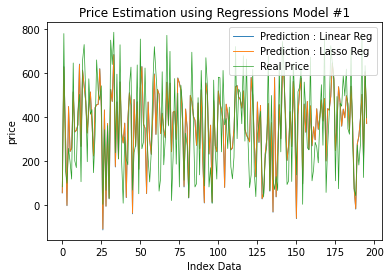

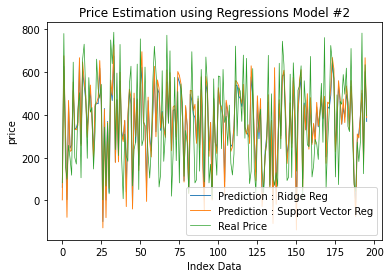

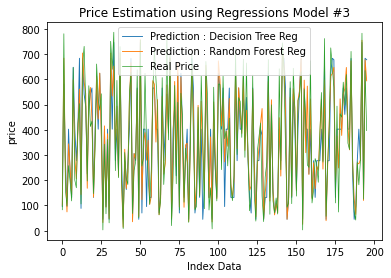

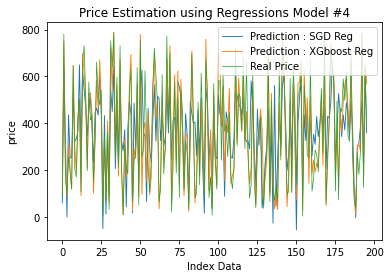

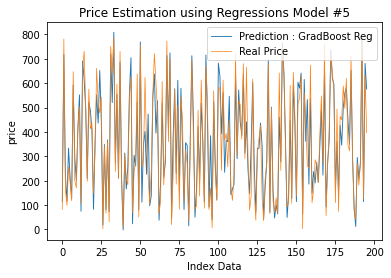

In [84]:
#see result of prediction result by using Linear Regression
plt.plot(pd.DataFrame(y_test_pred_LinReg), label = 'Prediction : Linear Reg' , linewidth= 0.9 )
plt.plot(pd.DataFrame(y_test_pred_Lasso), label = 'Prediction : Lasso Reg' , linewidth= 0.9 )
plt.plot(pd.DataFrame(y_test).reset_index(level=0, drop=True), label = 'Real Price', linewidth= 0.7 )
plt.legend()
plt.title('Price Estimation using Regressions Model #1')
plt.xlabel('Index Data')
plt.ylabel('price')
plt.show(  )
#plt.savefig("predict test 10.jpg") 

#see result of prediction result by using Linear Regression
plt.plot(pd.DataFrame(y_test_pred_Ridge), label = 'Prediction : Ridge Reg', linewidth= 0.9 )
plt.plot(pd.DataFrame(y_test_pred_SVR), label = 'Prediction : Support Vector Reg' , linewidth= 0.9 )
plt.plot(pd.DataFrame(y_test).reset_index(level=0, drop=True), label = 'Real Price', linewidth= 0.7 )
plt.legend()
plt.title('Price Estimation using Regressions Model #2')
plt.xlabel('Index Data')
plt.ylabel('price')
plt.show()
#plt.savefig("predict test 10.jpg") 

#see result of prediction result by using Linear Regression )
plt.plot(pd.DataFrame(y_test_pred_DTR), label = 'Prediction : Decision Tree Reg' , linewidth= 0.9 )
plt.plot(pd.DataFrame(y_test_pred_RFR), label = 'Prediction : Random Forest Reg' , linewidth= 0.9 )
plt.plot(pd.DataFrame(y_test).reset_index(level=0, drop=True), label = 'Real Price', linewidth= 0.7 )
plt.legend()
plt.title('Price Estimation using Regressions Model #3')
plt.xlabel('Index Data')
plt.ylabel('price')
plt.show()
#plt.savefig("predict test 10.jpg") 

#see result of prediction result by using Linear Regression )
plt.plot(pd.DataFrame(y_test_pred_SGD), label = 'Prediction : SGD Reg' , linewidth= 0.9 )
plt.plot(pd.DataFrame(y_test_pred_XGB), label = 'Prediction : XGboost Reg' , linewidth= 0.9 )
plt.plot(pd.DataFrame(y_test).reset_index(level=0, drop=True), label = 'Real Price', linewidth= 0.7 )
plt.legend()
plt.title('Price Estimation using Regressions Model #4')
plt.xlabel('Index Data')
plt.ylabel('price')
plt.show()
#plt.savefig("predict test 10.jpg") 

#see result of prediction result by using Linear Regression )
plt.plot(pd.DataFrame(y_test_pred_GBReg), label = 'Prediction : GradBoost Reg', linewidth= 0.9  )
plt.plot(pd.DataFrame(y_test).reset_index(level=0, drop=True), label = 'Real Price', linewidth= 0.7 )
plt.legend()
plt.title('Price Estimation using Regressions Model #5')
plt.xlabel('Index Data')
plt.ylabel('price')
plt.show()
#plt.savefig("predict test 10.jpg") 


In [85]:
data = np.array([['Algorithm', 'R2', 'MSE', 'MAE', 'RMSE', 'CV Value'],
                ['Linear Regression', r2_LinReg, mse_LinReg, mae_LinReg, rmse_LinReg, CV_value_LinReg],
                ['Lasso Regression', r2_Lasso, mse_Lasso, mae_Lasso, rmse_Lasso, CV_value_Lasso],
                ['Ridge Regression', r2_Ridge, mse_Ridge, mae_Ridge, rmse_Ridge, CV_value_Ridge],
                ['Support Vector Regression', r2_SVR, mse_SVR, mae_SVR, rmse_SVR, CV_value_SVR],
                ['Decision Tree Regression', r2_DTR, mse_DTR, mae_DTR, rmse_DTR, CV_value_DTR],
                ['Random Forest Regression', r2_RFR, mse_RFR, mae_RFR, rmse_RFR, CV_value_RFR],
                ['SGD Regression', r2_SGD, mse_SGD, mae_SGD, rmse_SGD, CV_value_SGD],
                ['XG-Boost Regression', r2_XGB, mse_XGB, mae_XGB, rmse_XGB, CV_value_XGB], 
                ['GradBoost Regression', r2_GBReg, mse_GBReg, mae_GBReg, rmse_GBReg, CV_value_GBReg],
                 ])

In [86]:
table_regression = pd.DataFrame(data=data[1:, 1:],
                     index = data[1:,0],
                     columns=(data[0,1:])).sort_values('R2', ascending = False)
table_regression

,R2,MSE,MAE,RMSE,CV Value
GradBoost Regression,0.883,5910.061,56.531,76.877,0.883
XG-Boost Regression,0.882,5998.653,57.982,77.451,0.882
Random Forest Regression,0.864,6906.707,59.713,83.107,0.864
Decision Tree Regression,0.773,11509.106,79.589,107.28,0.773
Ridge Regression,0.502,25263.132,128.181,158.944,0.503
Linear Regression,0.501,25275.027,127.771,158.981,0.503
Lasso Regression,0.501,25305.161,127.929,159.076,0.502
SGD Regression,0.498,25450.495,129.669,159.532,0.499
Support Vector Regression,0.472,26783.366,128.827,163.656,0.474


In [87]:
data_importance = pd.DataFrame({"features" : x_train.columns, "LinearReg":coef_Lin_reg, "Lasso.Reg" : coef_Lasso, "Ridge.Reg":coef_Ridge, "SGD.Reg":coef_SGD, "SV.Reg":coef_SVR, "Dec.Tree.Reg" : DT_Reg.feature_importances_, "RanForest.Reg": model_RFR.feature_importances_, "GradBoost.Reg":model_GBReg.feature_importances_, "XGBoost.Reg":model_XGB.feature_importances_}).sort_values('XGBoost.Reg', ascending = False)
data_importance

,features,LinearReg,Lasso.Reg,Ridge.Reg,SGD.Reg,SV.Reg,Dec.Tree.Reg,RanForest.Reg,GradBoost.Reg,XGBoost.Reg
4,Ram,-64.799149,-64.263632,-65.003882,-79.061123,-80.428346,0.261165,0.240578,0.197044,0.420799
3,Cpu,613.231797,611.400514,602.012469,594.573038,720.080891,0.500196,0.429789,0.475990,0.240771
1,TypeName,-45.012969,-43.444702,-46.174949,-59.909742,-9.559583,0.066578,0.072156,0.097855,0.099978
6,OpSys,422.357639,416.734966,401.899544,328.503517,355.468907,0.018797,0.017390,0.033505,0.089206
7,Weight,-4.392245,-3.547806,-11.381747,-45.238815,14.797016,0.124631,0.125330,0.084091,0.047859
5,Memory,91.195344,89.930022,90.291597,70.162394,95.835818,0.007001,0.030122,0.047969,0.040714
2,Inches,-122.933029,-121.494954,-112.280879,-101.630446,-183.326011,0.003818,0.017768,0.023429,0.034534
0,laptop_ID,59.038904,58.200498,58.351175,50.094006,84.763367,0.011281,0.047477,0.028970,0.013834
8,Brand,64.407008,63.341922,64.812034,59.964639,76.473962,0.006532,0.019391,0.011148,0.012305


Text(0.5, 1.0, 'Prediction vs. Real Price : Comparison')

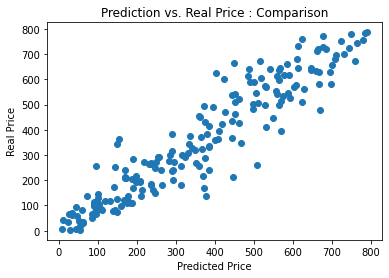

In [88]:
plt.scatter(y_test_pred_XGB, y_test )
plt.xlabel('Predicted Price')
plt.ylabel('Real Price')
plt.title('Prediction vs. Real Price : Comparison')